# Training: Random Forrest Classifier

In diesem Notebook wird ein Random Forrest Classifier zur Klassifizierung der Daten Trainiert. Dieser Dient dazu einen vergleich zu den anderen Modellen zu haben, der nicht auf Deep Learning basiert.

Zunächst werden alle nötigen Bibliotheken importiert.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

Anschließend werden die unterschiedlichen Datensätze geladen. Da beim Random Forrest Classifier kein Validierungsdatensatz im Training verwendet wird, enthält der `test_data_rf.csv` Datensatz sowohl die Daten die im Rahmen der anderen Modelle für Validierung verwendet wurden, als auch die Daten die im Rahmen der anderen Modelle für Testzwecke verwendet wurden.

In [2]:
train = pd.read_csv('../data/preprocessed/train_data.csv')
test = pd.read_csv('../data/preprocessed/test_data.csv')
val = pd.read_csv('../data/preprocessed/val_data.csv')
test_rf = pd.read_csv('../data/preprocessed/test_data_rf.csv')

In [3]:
X_train = train.drop("Is high risk", axis=1)
Y_train = train["Is high risk"]

X_test = test.drop("Is high risk", axis=1)
Y_test = test["Is high risk"]

X_val = val.drop("Is high risk", axis=1)
Y_val = val["Is high risk"]

X_test_rf = test_rf.drop("Is high risk", axis=1)
Y_test_rf = test_rf["Is high risk"]

Nun kann basierend auf diesen Daten ein Random Forrest Classifier trainiert werden.

In [4]:
# train a random forrest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# save the model
joblib.dump(rf, '../models/model_random_forest.pkl')

['../models/model_random_forest.pkl']

Anschließend kann die Genauigkeit des Modells auf die vier unterschiedlichen Datensätze getestet werden. Dabei fällt auf, dass das Modell auf den Validierungsdatensatz am schlechtesten abschneidet, allerdings auf den Datensatz aus Test- und Validierungsdaten sehr gut abschneidet.

In [5]:
# predict on the validation set
Y_val_pred = rf.predict(X_val)

# calculate the accuracy
accuracy = np.mean(Y_val_pred == Y_val)
print(f"Accuracy Validation: {accuracy:.2f}")

# predict on the test set
Y_test_pred = rf.predict(X_test)

# calculate the accuracy
accuracy = np.mean(Y_test_pred == Y_test)
print(f"Accuracy Test: {accuracy:.2f}")

# predict the training set
Y_train_pred = rf.predict(X_train)

# calculate the accuracy
accuracy = np.mean(Y_train_pred == Y_train)
print(f"Accuracy Train: {accuracy:.2f}")

# predict the test set that contains val and test data
Y_test_rf_pred = rf.predict(X_test_rf)

# calculate the accuracy
accuracy = np.mean(Y_test_rf_pred == Y_test_rf)
print(f"Accuracy Test RF: {accuracy:.2f}")

Accuracy Validation: 0.89
Accuracy Test: 0.98
Accuracy Train: 1.00
Accuracy Test RF: 0.98


Schlussendlich wird noch jeweils eine Confusion Matrix für die beiden unterschiedlichen Testdatensätze erstellt.

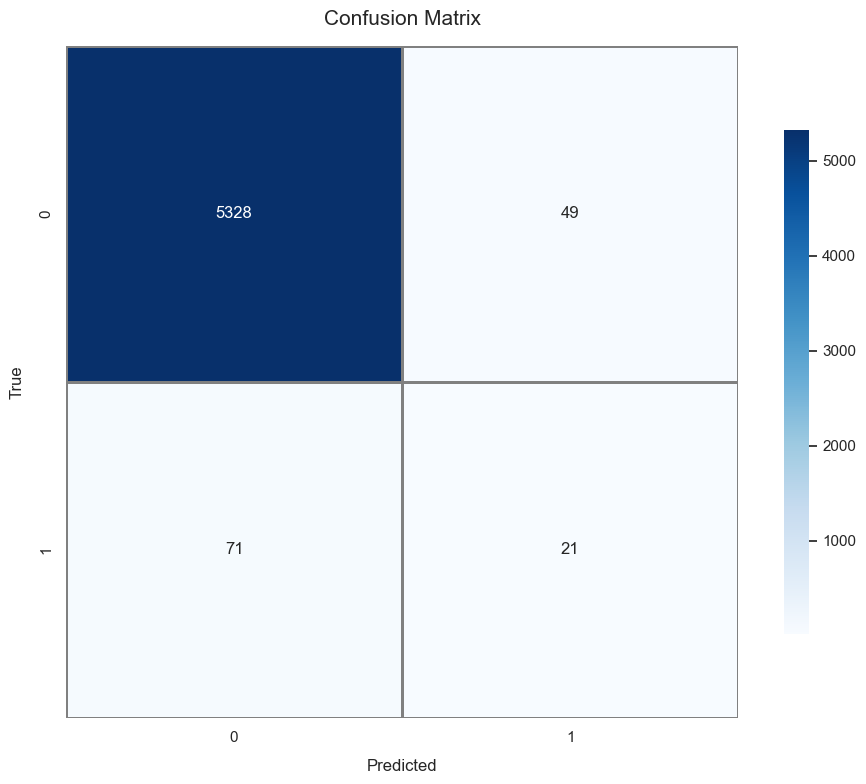

In [6]:
# calculate the confusion matrix and visualize it
cm = confusion_matrix(Y_test, Y_test_pred)

# Set the style of the heatmap
sns.set_theme(style="whitegrid")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Blues', cbar_kws={'shrink': 0.75}, linewidths=1, linecolor='grey')

# Add labels
plt.xlabel('Predicted', fontsize=12, labelpad=10)
plt.ylabel('True', fontsize=12, labelpad=10)
plt.title('Confusion Matrix', fontsize=15, pad=15)

# Improve the layout
plt.tight_layout()

# Display the plot
plt.show()


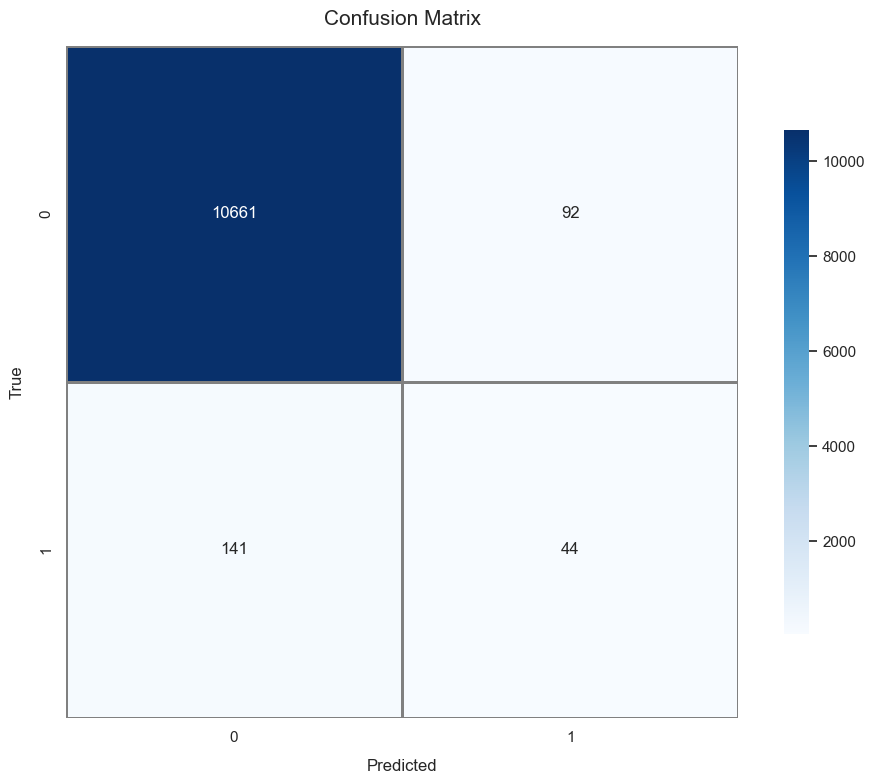

In [7]:
# calculate the confusion matrix and visualize it
cm = confusion_matrix(Y_test_rf, Y_test_rf_pred)

# Set the style of the heatmap
sns.set_theme(style="whitegrid")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', square=True, cmap='Blues', cbar_kws={'shrink': 0.75}, linewidths=1, linecolor='grey')

# Add labels
plt.xlabel('Predicted', fontsize=12, labelpad=10)
plt.ylabel('True', fontsize=12, labelpad=10)
plt.title('Confusion Matrix', fontsize=15, pad=15)

# Improve the layout
plt.tight_layout()

# Display the plot
plt.show()
